In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
train_original=pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv',nrows=1000000,parse_dates=['pickup_datetime'])
test_original=pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

In [3]:
train=train_original.copy()
test=test_original.copy()

In [4]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [6]:
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'])

In [7]:
train_original.shape,test_original.shape

((1000000, 8), (9914, 7))

In [8]:
train.isnull().sum()#Very few Missing value, so will delete the rows that have it

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [9]:
test.isnull().sum() #good , No missing in test

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
train.dropna(axis=0,inplace=True)

In [11]:
train.shape## only 10 were deleted. the same rows had NAs

(999990, 8)

In [12]:
train.describe() #Negative fare,Latitudes range from -90 to 90, and longitudes range from -180 to 80.
#Passeneger count max is 208? Is it a Cab or train?? :D
# A lot of cleaning will be needed here

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [13]:
test.describe()#data looks good for the test data

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [14]:
print(sum(train['fare_amount']<0)) #only a few values are negative, Will delete them
#Also from Kaggle found that the NYC cabs charge a min of $2.50(2019), so will delete records below $2(adjusting for inflation)

print(sum(train.fare_amount<2)) #very few records, so wouldnt matter anyways

38
77


In [15]:
train=train[(train['fare_amount']>=2)]
train.shape

(999913, 8)

In [16]:
train['passenger_count'].value_counts()#passenger count 208?? Passenger count 0, lets see the fares for these.

1      691284
2      148096
5       70593
3       43762
4       21427
6       21195
0        3555
208         1
Name: passenger_count, dtype: int64

In [17]:
#delete passenger count 208 will be deleted. passenger count 0 will also be deleted as  it doesnot make sense + test doesnot have this
train=train[(train['passenger_count']<7)&(train['passenger_count']>0)]

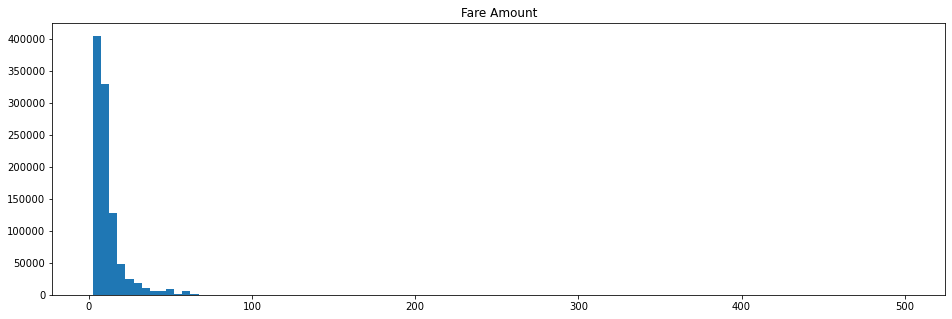

In [18]:
plt.figure(figsize=(16, 5))
plt.hist(train['fare_amount'],bins=100);
plt.title("Fare Amount");

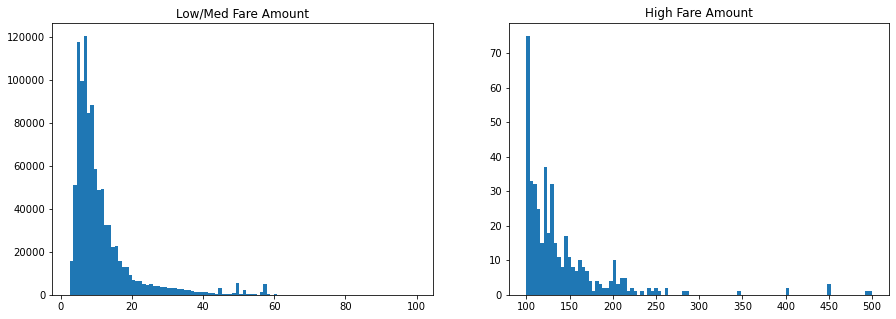

In [19]:
#lets Zoom into the above figure. Be mindful of the Y axis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Low/Med Fare Amount")
plt.hist(train[train['fare_amount']<100]['fare_amount'],bins=100);
plt.subplot(1, 2, 2)
plt.title("High Fare Amount")
plt.hist(train[train['fare_amount']>=100]['fare_amount'],bins=100);
#looks like there are many rides having fixed charge of 350,400,450 and 500. But these are very few in numbers <100 total

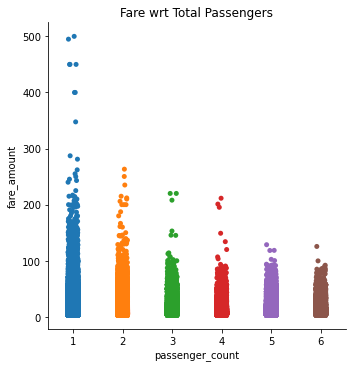

In [20]:
sns.catplot(x='passenger_count', y='fare_amount', data=train);
plt.title('Fare wrt Total Passengers');#so fare not very much dependent on the # of Passenegrs

In [21]:
#Create Day of Week, Month, Year, Time of Day etc variables from the pickup_datetime variable
def process_date(df,colname):
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter','hour']
    for part in date_parts:
        part_col = colname.split('_')[0] + "_" + part
        df[part_col] = getattr(df[colname].dt, part).astype(int)
    
    return df

train = process_date(train,'pickup_datetime')
test = process_date(test,'pickup_datetime')

In [22]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_weekday,pickup_month,pickup_weekofyear,pickup_day,pickup_quarter,pickup_hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,6,25,15,2,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,33,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,16,21,2,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,10,9,1,7


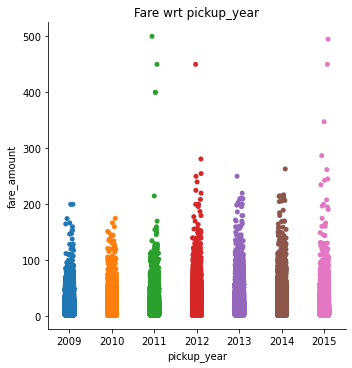

In [23]:
sns.catplot(x='pickup_year', y='fare_amount', data=train);
plt.title('Fare wrt pickup_year');#definitely see some outliers in each year

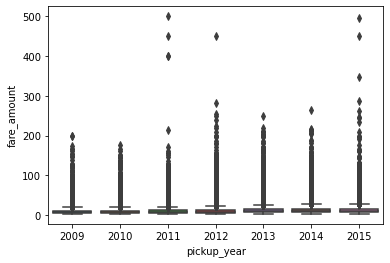

In [24]:
sns.boxplot(x='pickup_year', y='fare_amount', data=train);

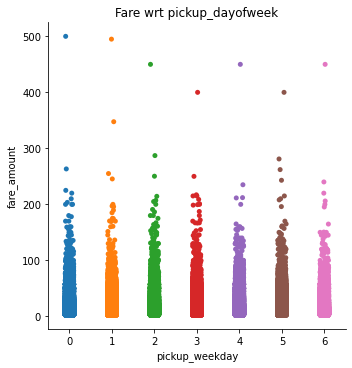

In [25]:
sns.catplot(x='pickup_weekday', y='fare_amount', data=train);
plt.title('Fare wrt pickup_dayofweek');#not much of a difference except  afew outliers

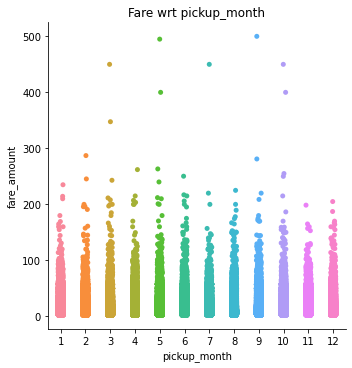

In [26]:
sns.catplot(x='pickup_month', y='fare_amount', data=train);
plt.title('Fare wrt pickup_month');#not much of a difference except  afew outliers but in Summer months

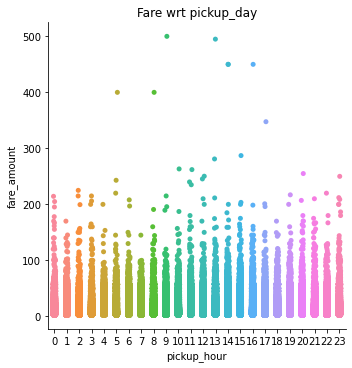

In [27]:
sns.catplot(x='pickup_hour', y='fare_amount', data=train);
plt.title('Fare wrt pickup_day');

In [28]:
#Find min/max longitude and latitude in the data
print('Train data')
print('Min Pickup Longitude: {}, Max Pickup Longitude {}'.format(max(train['pickup_longitude']),min(train['pickup_longitude'])))
print('Min Drop Off Longitude: {}, Max Drop Off Longitude {}'.format(max(train['dropoff_longitude']),min(train['dropoff_longitude'])))
print('Min Pickup Latitude: {}, Max Pickup Latitude {}'.format(max(train['pickup_latitude']),min(train['pickup_latitude'])))
print('Min Drop Off Latitude: {}, Max Drop Off Latitude {}'.format(max(train['dropoff_latitude']),min(train['dropoff_latitude'])))

Train data
Min Pickup Longitude: 2522.271325, Max Pickup Longitude -3377.6809350000003
Min Drop Off Longitude: 45.581619, Max Drop Off Longitude -3383.2966079999997
Min Pickup Latitude: 2621.62843, Max Pickup Latitude -3116.285383
Min Drop Off Latitude: 1651.553433, Max Drop Off Latitude -3114.3385670000002


In [29]:
#lets correct the lat/long values. Note 1degree is approx 100 kms for both Lat & long (at this place on earth)
print(np.quantile(train['pickup_latitude'],[0.025,0.05,0.95,0.975]))
print(np.quantile(train['dropoff_latitude'],[0.025,0.05,0.95,0.975]))
#Analysing these results, lets say we will take threshold as 40.50 and 40.90( after rounding off in decimal places)

[40.644677  40.702321  40.78774   40.7966891]
[40.6423092 40.686569  40.793875  40.806165 ]


In [30]:
print(np.quantile(train['pickup_longitude'],[0.025,0.05,0.95,0.975]))
print(np.quantile(train['dropoff_longitude'],[0.025,0.05,0.95,0.975]))
#Analysing these results, lets say we will take threshold as -74.10 and -73.60( after rounding off in decimal places)
#Note we may be tempted to use the limits from test data but that is IMHO cheating

[-74.00946   -74.006797  -73.8712816 -73.781952 ]
[-74.010594  -74.0073712 -73.8774762 -73.7843029]


In [31]:
print('Test data')
print('Min Pickup Longitude: {}, Max Pickup Longitude {}'.format(max(test['pickup_longitude']),min(test['pickup_longitude'])))
print('Min Drop Off Longitude: {}, Max Drop Off Longitude {}'.format(max(test['dropoff_longitude']),min(test['dropoff_longitude'])))
print('Min Pickup Latitude: {}, Max Pickup Latitude {}'.format(max(test['pickup_latitude']),min(test['pickup_latitude'])))
print('Min Drop Off Latitude: {}, Max Drop Off Latitude {}'.format(max(test['dropoff_latitude']),min(test['dropoff_latitude'])))

Test data
Min Pickup Longitude: -72.986532, Max Pickup Longitude -74.252193
Min Drop Off Longitude: -72.990963, Max Drop Off Longitude -74.263242
Min Pickup Latitude: 41.709555, Max Pickup Latitude 40.573143
Min Drop Off Latitude: 41.696683, Max Drop Off Latitude 40.568973


In [32]:
train.shape

(996357, 15)

In [33]:
#we see a huge difference between train & test. The extreme co-ordinates of train are not even present in the US not even feasible
#I will just remove the rows based on the max/min co-ordinates I see in the test data. As the test data seems very clean
#with the max/min values of lat-long
boundary=(-74.10,-73.60,40.50,40.90)
train=train[(train['pickup_longitude']>boundary[0])&(train['pickup_longitude']<boundary[1])&\
            (train['pickup_latitude']>boundary[2])&(train['pickup_latitude']<boundary[3])]

train=train[(train['dropoff_longitude']>boundary[0])&(train['dropoff_longitude']<boundary[1])&\
            (train['dropoff_latitude']>boundary[2])&(train['dropoff_latitude']<boundary[3])]

In [34]:
train.shape

(972616, 15)

In [35]:
#https://en.wikipedia.org/wiki/Haversine_formula
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180 , since 2pi radians=260degrees
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin... #multiply this by 0.62137 for miles

In [36]:
train['Haversine_distance']=distance(train['pickup_latitude'],train['pickup_longitude'],\
                                     train['dropoff_latitude'],train['dropoff_longitude'])
test['Haversine_distance']=distance(test['pickup_latitude'],test['pickup_longitude'],\
                                     test['dropoff_latitude'],test['dropoff_longitude'])

In [37]:
#lest see the distance 
train['Haversine_distance'].describe()#max distance is 35kms

count    972616.000000
mean          3.284780
std           3.496644
min           0.000000
25%           1.254014
50%           2.150111
75%           3.903130
max          35.899653
Name: Haversine_distance, dtype: float64

In [38]:
np.quantile(test['Haversine_distance'],[0.95,0.99,1])#for test the max is 100 kms but i believe that such high values are outliers
#So, though the train seems a bit different from test, it okay i guess as test has a few outliers.

array([10.11406941, 20.55175055, 99.99604035])

In [39]:
print(train[train['Haversine_distance']==0]['fare_amount'].describe())
print(train[train['Haversine_distance']==0].shape)
#Many, 10k records have the same Pickup& Drop location but still a positive fare. 
#May be a genuine ride as we have a few of these in test too

count    10097.000000
mean        10.472971
std         13.155933
min          2.500000
25%          4.900000
50%          6.900000
75%         10.100000
max        500.000000
Name: fare_amount, dtype: float64
(10097, 16)


In [40]:
print(test[test['Haversine_distance']==0].shape)

(85, 15)


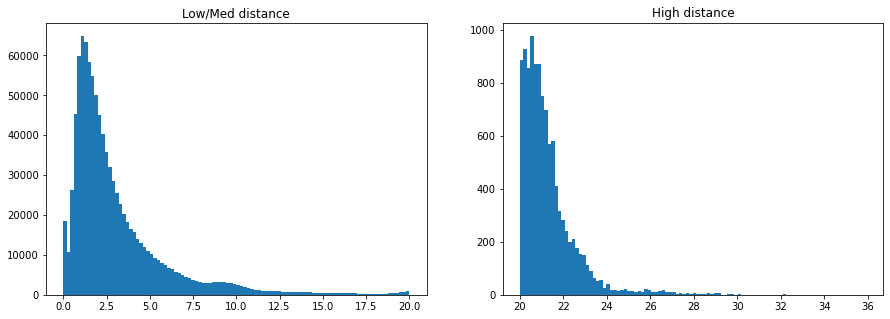

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Low/Med distance")
plt.hist(train[train['Haversine_distance']<20]['Haversine_distance'],bins=100);
plt.subplot(1, 2, 2)
plt.title("High distance")
plt.hist(train[train['Haversine_distance']>=20]['Haversine_distance'],bins=100);

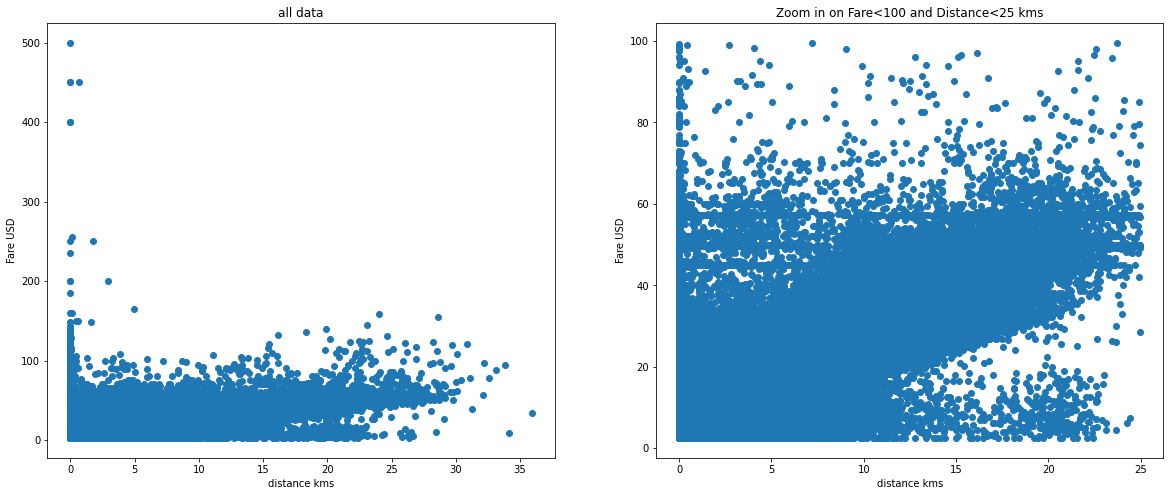

In [42]:
#plot Fare vs ditance.
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['Haversine_distance'],train['fare_amount']);
plt.xlabel('distance kms')
plt.ylabel('Fare USD')
plt.title('all data')

plt.subplot(1, 2, 2)
plt.scatter(train[(train['Haversine_distance']<25)&(train['fare_amount']<100)]['Haversine_distance'],\
            train[(train['Haversine_distance']<25)&(train['fare_amount']<100)]['fare_amount']);
plt.xlabel('distance kms')
plt.ylabel('Fare USD')
plt.title('Zoom in on Fare<100 and Distance<25 kms');
#we can see that as the distance increases Fare amount increases

In [43]:
test['Haversine_distance'].describe(),train['Haversine_distance'].describe()
#we can see there are a lot of outliers in the training data. 

(count    9914.000000
 mean        3.435371
 std         3.972374
 min         0.000000
 25%         1.298277
 50%         2.217412
 75%         4.045302
 max        99.996040
 Name: Haversine_distance, dtype: float64,
 count    972616.000000
 mean          3.284780
 std           3.496644
 min           0.000000
 25%           1.254014
 50%           2.150111
 75%           3.903130
 max          35.899653
 Name: Haversine_distance, dtype: float64)

In [44]:
# What have we done so far?
# 1) Applied filtering on lat/long based on percentiles
# 2) Removed <$2 fare
# 3) Removed >6 Passenger_count
# 4) Calculated Haversine Distance, that comes to max 35 kms in train but 99 kms in test
# 5) the test max HD is actually an outlier (just one/2 record with 99kms), all other are in fact below 25 kms

In [45]:
print('Count of train rows with 0 haversine distance is {}'.format(sum(train['Haversine_distance']==0)))
#lets get drop these rows where distance is 0

Count of train rows with 0 haversine distance is 10097


In [46]:
print('Count of test rows with 0 haversine distance is {}'.format(sum(test['Haversine_distance']==0)))
#since test also has a few HD==0, i will not delete these observations from train data

Count of test rows with 0 haversine distance is 85


In [47]:
#Latitude: 1 deg = 110.574 km
#Unlike latitude, the distance between degrees of longitude varies greatly depending upon your 
#location on the planet. They are farthest apart at the equator and converge at the poles.
#A degree of longitude is widest at the equator with a distance of 110kms
#np.digitize([2,11,21,33],bins=[1,5,10,15,20])#the bins are 0(0-1),1(1-5),2(5-10),3(10-15),4(15-20),5(20-)
#above gives array([1, 3, 5, 5])
#boundary=(-74.50,-72.80,40.50,41.80)Long/lat 
#Delta long is 1.7 and delta lat is 1.29, so around 1.7*90=153(lesser than it is at equator) kms lat and 1.29*110=142 kms long
#distance(lat1, lon1, lat2, lon2)

In [48]:
#Some trips, like to/from an airport, are fixed fee. To prce this see the plot below
# JFK airport coordinates, see https://www.travelmath.com/airport/JFK
jfk = (-73.7822222222, 40.6441666667) #airport
nyc = (-74.0063889, 40.7141667)#city centre

def plot_location_fare(loc, name, range=2): #within range kms of the location
    # select all datapoints with dropoff location within range
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    idx = (distance(train.pickup_latitude, train.pickup_longitude, loc[1], loc[0]) < range)
    train[idx].fare_amount.hist(bins=100, ax=axs[0])
    axs[0].set_xlabel('fare $USD')
    axs[0].set_title('Histogram pickup location within {} KMS of {}'.format(range, name))

    idx = (distance(train.dropoff_latitude, train.dropoff_longitude, loc[1], loc[0]) < range)
    train[idx].fare_amount.hist(bins=100, ax=axs[1])
    axs[1].set_xlabel('fare $USD')
    axs[1].set_title('Histogram dropoff location within {} KMS of {}'.format(range, name));

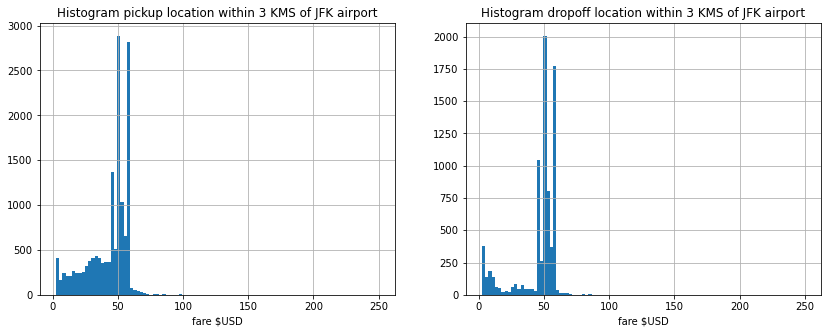

In [49]:
plot_location_fare(jfk,'JFK airport',3)#looks like it is true. Fare is the same for most rides within 5kms from jfk airport

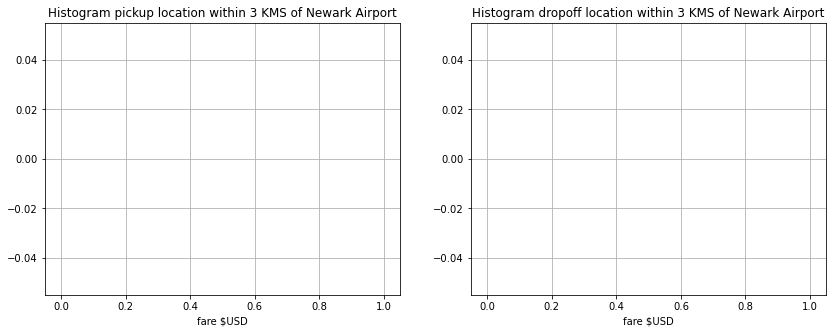

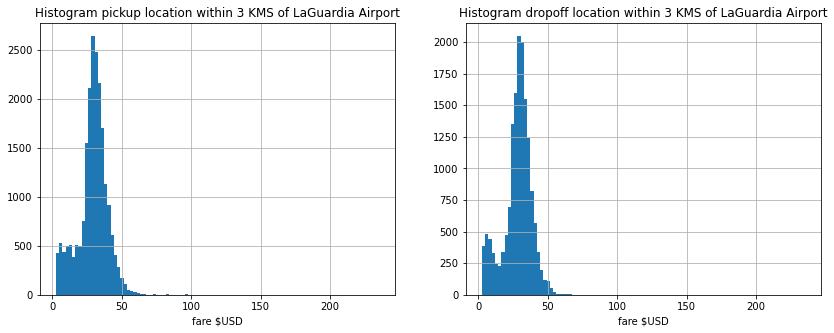

In [50]:
ewr = (-74.175, 40.69) # Newark Liberty International Airport, see https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) # LaGuardia Airport, see https://www.travelmath.com/airport/LGA
plot_location_fare(ewr, 'Newark Airport',3)
plot_location_fare(lgr, 'LaGuardia Airport',3)

In [51]:
#So,lets add a binary variable which is 1 if the pick up is from JFK and another if the drop is at JFk
##TRAIN
#This did not help ( got to know by looking at the feature importance plot from XGB) so wont take this nomore
# train.loc[:,'Pick_up_jfk']=np.where(distance(train.pickup_latitude,\
#                                                             train.pickup_longitude, jfk[1], jfk[0])<3,1,0)

# train.loc[:,'dropoff_jfk']=np.where(distance(train.dropoff_latitude,\
#                                                             train.dropoff_longitude, jfk[1], jfk[0])<3,1,0)

# train.loc[:,'Pick_up_ewr']=np.where(distance(train.pickup_latitude,\
#                                                             train.pickup_longitude, ewr[1], ewr[0])<3,1,0)

# train.loc[:,'dropoff_ewr']=np.where(distance(train.dropoff_latitude,\
#                                                             train.dropoff_longitude, ewr[1], ewr[0])<3,1,0)


# train.loc[:,'Pick_up_lgr']=np.where(distance(train.pickup_latitude,\
#                                                             train.pickup_longitude, lgr[1], lgr[0])<3,1,0)

# train.loc[:,'dropoff_lgr']=np.where(distance(train.dropoff_latitude,\
#                                                             train.dropoff_longitude, lgr[1], lgr[0])<3,1,0)

# ##Test

# test.loc[:,'Pick_up_jfk']=np.where(distance(test.pickup_latitude,\
#                                                             test.pickup_longitude, jfk[1], jfk[0])<3,1,0)

# test.loc[:,'dropoff_jfk']=np.where(distance(test.dropoff_latitude,\
#                                                             test.dropoff_longitude, jfk[1], jfk[0])<3,1,0)

# test.loc[:,'Pick_up_ewr']=np.where(distance(test.pickup_latitude,\
#                                                             test.pickup_longitude, ewr[1], ewr[0])<3,1,0)

# test.loc[:,'dropoff_ewr']=np.where(distance(test.dropoff_latitude,\
#                                                             test.dropoff_longitude, ewr[1], ewr[0])<3,1,0)


# test.loc[:,'Pick_up_lgr']=np.where(distance(test.pickup_latitude,\
#                                                             test.pickup_longitude, lgr[1], lgr[0])<3,1,0)

# test.loc[:,'dropoff_lgr']=np.where(distance(test.dropoff_latitude,\
#                                                             test.dropoff_longitude, lgr[1], lgr[0])<3,1,0)

In [52]:
train.sample(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_weekday,pickup_month,pickup_weekofyear,pickup_day,pickup_quarter,pickup_hour,Haversine_distance
849368,2013-09-05 21:14:00.00000041,7.00,2013-09-05 21:14:00+00:00,-73.992085,40.748452,-73.987055,40.734905,5,2013,3,9,36,5,3,21,1.564830
275516,2009-10-13 17:44:00.00000040,8.10,2009-10-13 17:44:00+00:00,-74.003622,40.748405,-73.992647,40.768487,5,2009,1,10,42,13,4,17,2.416786
752114,2009-01-11 23:44:35.0000002,5.00,2009-01-11 23:44:35+00:00,-73.986330,40.756549,-73.992504,40.743899,1,2009,6,1,2,11,1,23,1.499684
90448,2011-03-09 23:23:00.000000179,4.50,2011-03-09 23:23:00+00:00,-73.992958,40.745150,-73.984900,40.736570,1,2011,2,3,10,9,1,23,1.170936
773757,2010-05-06 14:46:00.000000168,24.27,2010-05-06 14:46:00+00:00,-73.872960,40.774000,-73.948890,40.776630,1,2010,3,5,18,6,2,14,6.400393


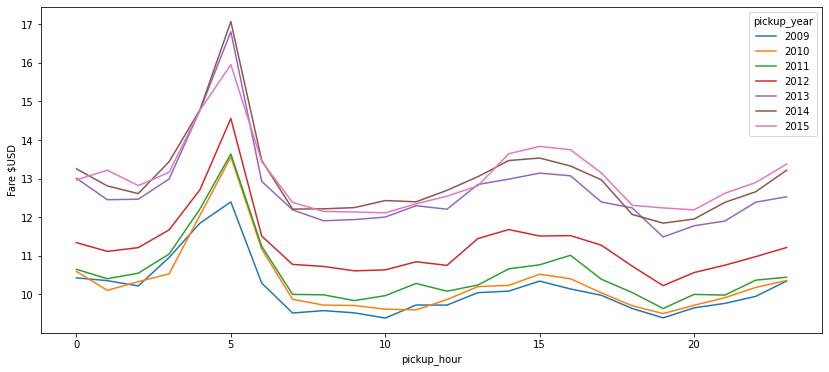

In [53]:
# display pivot table
train.pivot_table('fare_amount', index='pickup_hour', columns='pickup_year').plot(figsize=(14,6))
plt.ylabel('Fare $USD');
#we can see that the average Fare vs time of day has been increasing with year. #Inflation

In [54]:
def select_within_boundingbox(df, BB):
    '''
    returns a Boolean series
    '''
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

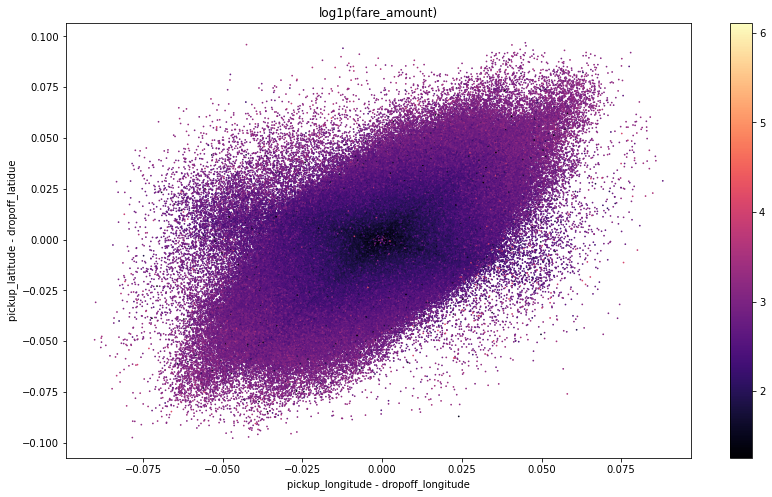

In [55]:
#Relevance of direction for fare amount
#How do we find out of the direction influences the fare_amount?

#Remember the co-ordinates are the LAt/Long value. from this we calculate DELTA Lat 
#and DELTA LONG and plot that wrt Fare to see if there is any
#Difference
train['delta_lat']=train['pickup_latitude']-train['dropoff_latitude']
train['delta_long']=train['pickup_longitude']-train['dropoff_longitude']

plt.figure(figsize=(14,8))
# Select only the trips in Manhattan
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)#found from Google
within_manhattan_train=select_within_boundingbox(train,BB_manhattan)


plt.scatter(train[within_manhattan_train]['delta_long'],train[within_manhattan_train]['delta_lat'],\
            s=0.5, alpha=1.0, 
            c=np.log1p(train[within_manhattan_train]['fare_amount']), cmap='magma')
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latidue')
plt.title('log1p(fare_amount)');
#Fare seems to be lesser in the center and more around perimeter nad i can see a star here.(slightly tilted). 

In [56]:
print('total {} records out of {} are in manhattan. So {}'.format(sum(within_manhattan_train),train.shape[0],\
                                                                 sum(within_manhattan_train)*100/train.shape[0]))
#Since most of the records are from Manhattan, If my model predicts well for these, my overall 
#performance will be quite good

total 817317 records out of 972616 are in manhattan. So 84.03285572106566


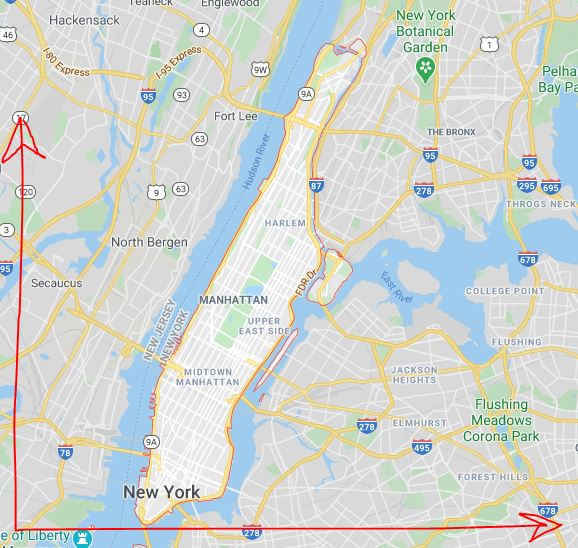

In [57]:
from IPython.display import Image
Image(filename = "../input/manhattan/manhattan.JPG", width = 400, height = 350)

In [58]:
#if you see the map of Manhattan, the streets are at 60 degrees and -30 degrees with horizontal. 
#hence, 2 location along this angle are very close to each other. hence you see the star.
#lets get a new variable that is the actual angle with the horizontal. This variable will help 
#whatever model we build later

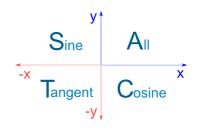

In [59]:
Image(filename = "../input/astc-picjpg/astc.JPG", width = 150, height = 120)

In [60]:
#From the triangle that is formed above for a given street, we know the base ( delta long), perpen(delta lat)
#and can calculate the Hypotenuse ( l2 distance)

#So we can also calculate the angle of the route with the horizontal.
#TAN (Theta)= P/base
#So, Theta in degrees is tan-1 of p/base
# direction of a trip, from 180 to -180 degrees. Horizontal axes = 0 degrees.
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [61]:
#I am calculatig this for all records but this will be applicate to only the records in Manhattan
#I will create a Binary variable saying if a record is within Manhattan or not
train['direction'] = calculate_direction(train['delta_long'],train['delta_lat'])
train['direction'].describe()

count    972616.000000
mean        -15.282232
std         102.757133
min        -179.998066
25%        -119.230353
50%           0.000000
75%          63.506411
max         179.999547
Name: direction, dtype: float64

In [62]:
#prepare the Delta variables for test data
test['delta_lat']=test['pickup_latitude']-test['dropoff_latitude']
test['delta_long']=test['pickup_longitude']-test['dropoff_longitude']
test['direction'] = calculate_direction(test['delta_long'],test['delta_lat'])
test['direction'].describe()

count    9914.000000
mean      -15.375522
std       103.672769
min      -179.968305
25%      -119.620086
50%        -1.939144
75%        64.471787
max       179.970002
Name: direction, dtype: float64

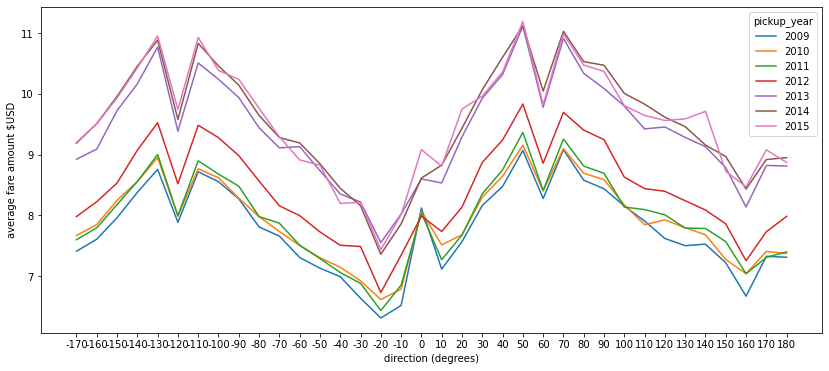

In [63]:
# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(train[within_manhattan_train]['direction'], np.linspace(-180, 180, 37))
train[within_manhattan_train].pivot_table('fare_amount', index=[direc], columns='pickup_year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');
#Clearly avg Fare is Lower in 60 degree and -120 degrees as Manhattan road are very straight in that direction(so less total distance taken)
#also google maps show me that the 60 degree roads are broader than others/hence less traffic
#also avg fare is lowest in -20degree as there is hardly any land in this direction. Mostly water. So the distances along this must be less

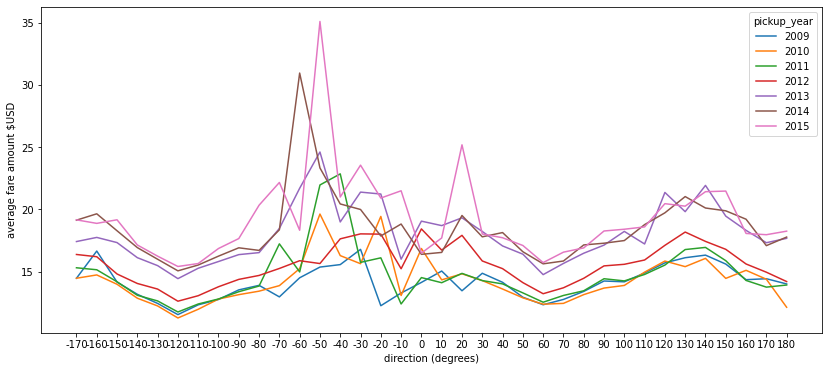

In [64]:
#but for the same Haversine distance, the total actual distance and hence FARE along 60& 120 degrees must be lesser than at other angles
within_manhattan_train_and_around_5kms_trip_HD=within_manhattan_train &(train['Haversine_distance']>4.5)&(train['Haversine_distance']<5.5)
idx2=within_manhattan_train_and_around_5kms_trip_HD
# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(train[idx2]['direction'], np.linspace(-180, 180, 37))
train[idx2].pivot_table('fare_amount', index=[direc], columns='pickup_year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

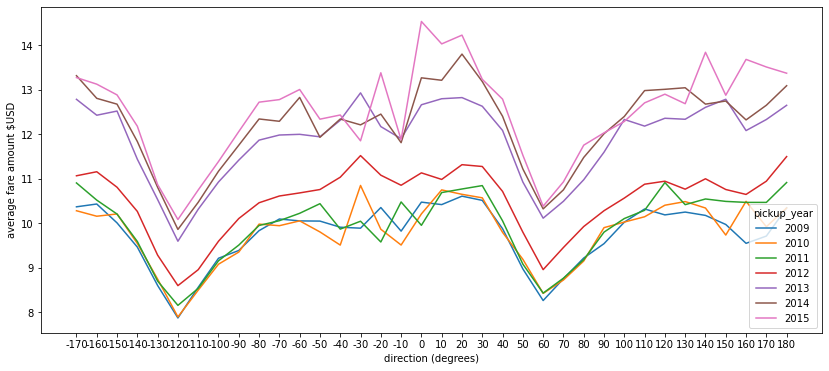

In [65]:
#The above should be observed at any particular total Haversine distance
within_manhattan_train_and_around_3kms_trip_HD=within_manhattan_train &(train['Haversine_distance']>2.5)&(train['Haversine_distance']<3.5)
idx3=within_manhattan_train_and_around_3kms_trip_HD
# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(train[idx3]['direction'], np.linspace(-180, 180, 37))
train[idx3].pivot_table('fare_amount', index=[direc], columns='pickup_year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

In [66]:
## add the binary column for Manhatttan or not

train['manhattan']=within_manhattan_train.map(lambda x: int(x))

within_manhattan_test=select_within_boundingbox(test,BB_manhattan)
test['manhattan']=within_manhattan_test.map(lambda x: int(x))

In [67]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_weekday,pickup_month,pickup_weekofyear,pickup_day,pickup_quarter,pickup_hour,Haversine_distance,delta_lat,delta_long,direction,manhattan
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,6,25,15,2,17,1.030764,0.009041,-0.002701,106.633523,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,1,5,1,16,8.450134,-0.070701,-0.036780,-117.484306,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,33,18,3,0,1.389525,0.010708,0.008504,51.544361,1
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,16,21,2,4,2.799270,-0.024949,0.004437,-79.915791,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,10,9,1,7,1.999157,-0.015754,-0.011440,-125.985832,1


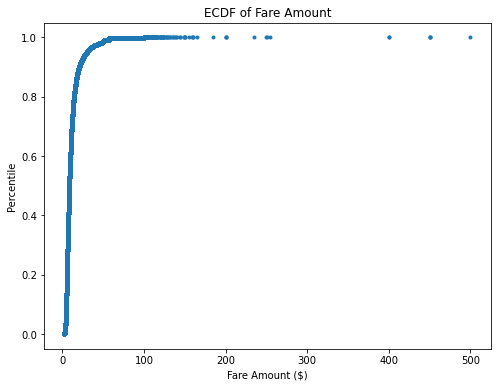

In [68]:
#Empirical Cumulative Distribution Function Plot for fare_amount
def ecdf(x):
    """Empirical cumulative distribution function of a variable"""
    # Sort in ascending order
    x = np.sort(x)
    n = len(x)
    
    # Go from 1/n to 1
    y = np.arange(1, n + 1, 1) / n
    
    return x, y

xs, ys = ecdf(train['fare_amount'])
plt.figure(figsize = (8, 6))
plt.plot(xs, ys, '.')
plt.ylabel('Percentile'); plt.title('ECDF of Fare Amount'); plt.xlabel('Fare Amount ($)');

In [69]:
np.corrcoef(train['Haversine_distance'],train['fare_amount'])#there is a good co-relation

array([[1.        , 0.86502904],
       [0.86502904, 1.        ]])

In [70]:
## Add a column that gives the pickup and dropoff distance from the 3 airports and NYC centre. Thsi may help us capture the fixed charge 
#from these the airports and prime location charges
ewr = (-74.175, 40.69) # Newark Liberty International Airport, see https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) # LaGuardia Airport, see https://www.travelmath.com/airport/LGA
jfk = (-73.7822222222, 40.6441666667) #airport
nyc = (-74.0063889, 40.7141667)#city centre
#distance(lat1, lon1, lat2, lon2) use this previously built function to calculate distance
train['dis_pickup_from_ewr']=distance(train['pickup_latitude'],train['pickup_longitude'],ewr[1],ewr[0])
train['dis_dropoff_from_ewr']=distance(train['dropoff_latitude'],train['dropoff_longitude'],ewr[1],ewr[0])

train['dis_pickup_from_lgr']=distance(train['pickup_latitude'],train['pickup_longitude'],lgr[1],lgr[0])
train['dis_dropoff_from_lgr']=distance(train['dropoff_latitude'],train['dropoff_longitude'],lgr[1],lgr[0])

train['dis_pickup_from_jfk']=distance(train['pickup_latitude'],train['pickup_longitude'],jfk[1],jfk[0])
train['dis_dropoff_from_jfk']=distance(train['dropoff_latitude'],train['dropoff_longitude'],jfk[1],jfk[0])

train['dis_pickup_from_nyc']=distance(train['pickup_latitude'],train['pickup_longitude'],nyc[1],nyc[0])
train['dis_dropoff_from_nyc']=distance(train['dropoff_latitude'],train['dropoff_longitude'],nyc[1],nyc[0])

#For test

test['dis_pickup_from_ewr']=distance(test['pickup_latitude'],test['pickup_longitude'],ewr[1],ewr[0])
test['dis_dropoff_from_ewr']=distance(test['dropoff_latitude'],test['dropoff_longitude'],ewr[1],ewr[0])

test['dis_pickup_from_lgr']=distance(test['pickup_latitude'],test['pickup_longitude'],lgr[1],lgr[0])
test['dis_dropoff_from_lgr']=distance(test['dropoff_latitude'],test['dropoff_longitude'],lgr[1],lgr[0])

test['dis_pickup_from_jfk']=distance(test['pickup_latitude'],test['pickup_longitude'],jfk[1],jfk[0])
test['dis_dropoff_from_jfk']=distance(test['dropoff_latitude'],test['dropoff_longitude'],jfk[1],jfk[0])

test['dis_pickup_from_nyc']=distance(test['pickup_latitude'],test['pickup_longitude'],nyc[1],nyc[0])
test['dis_dropoff_from_nyc']=distance(test['dropoff_latitude'],test['dropoff_longitude'],nyc[1],nyc[0])

In [71]:
train.sample(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_weekday,...,direction,manhattan,dis_pickup_from_ewr,dis_dropoff_from_ewr,dis_pickup_from_lgr,dis_dropoff_from_lgr,dis_pickup_from_jfk,dis_dropoff_from_jfk,dis_pickup_from_nyc,dis_dropoff_from_nyc
876297,2010-03-23 15:46:16.0000005,8.5,2010-03-23 15:46:16+00:00,-73.968247,40.768344,-73.981421,40.744392,3,2010,1,...,61.188472,1,19.478393,17.399617,8.275732,9.807270,20.893465,20.155403,6.827693,3.965096
842336,2010-03-02 16:22:16.0000001,6.9,2010-03-02 16:22:16+00:00,-73.992761,40.768443,-74.006251,40.749827,1,2010,1,...,54.071205,1,17.660464,15.700427,10.339524,11.692891,22.492517,22.242771,6.143487,3.965261
990393,2014-04-10 06:59:25.0000001,7.5,2014-04-10 06:59:25+00:00,-73.965399,40.775156,-73.983299,40.762661,1,2014,3,...,34.916763,1,20.039116,18.061972,8.053865,9.576500,21.225762,21.468806,7.610241,5.732503


In [72]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_year', 'pickup_weekday', 'pickup_month',
       'pickup_weekofyear', 'pickup_day', 'pickup_quarter', 'pickup_hour',
       'Haversine_distance', 'delta_lat', 'delta_long', 'direction',
       'manhattan', 'dis_pickup_from_ewr', 'dis_dropoff_from_ewr',
       'dis_pickup_from_lgr', 'dis_dropoff_from_lgr', 'dis_pickup_from_jfk',
       'dis_dropoff_from_jfk', 'dis_pickup_from_nyc', 'dis_dropoff_from_nyc'],
      dtype='object')

In [73]:
#COlumns that i plan to use for modelling
model_cols=['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
        'pickup_year', 'pickup_weekday', 'pickup_month',
       'pickup_day', 'pickup_hour',
       'Haversine_distance', 'direction','manhattan', 'dis_pickup_from_ewr', 'dis_dropoff_from_ewr',
       'dis_pickup_from_lgr', 'dis_dropoff_from_lgr', 'dis_pickup_from_jfk',
       'dis_dropoff_from_jfk', 'dis_pickup_from_nyc', 'dis_dropoff_from_nyc']

## Modelling

In [74]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit,StratifiedKFold,RandomizedSearchCV
def rmse(y_true, y_pred):
    diff = mean_squared_error(y_true, y_pred)
    return diff**0.5
my_scorer = make_scorer(rmse,greater_is_better=False)

### Linear Regression

In [75]:
#for Linear regression since they do not have High variance, i will simply divide Train into train & valdation
#and use this to finally predict on the test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X=train[model_cols]
y=train['fare_amount']

X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.30, random_state=2020)

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)
y_train_pred = model_lin.predict(X_train)
y_valid_pred = model_lin.predict(X_valid)
y_test_pred = model_lin.predict(test[model_cols])

print('RMSE on the Validation data is {} and on train is {}'.format(rmse(y_valid,y_valid_pred),\
                                                                    rmse(y_train,y_train_pred)))
#This scores 5.4 on Kaggle LB. So we have overfit the data

RMSE on the Validation data is 4.355290826780722 and on train is 4.37667709460875


In [76]:
#Check if there is Variance in Linear Regression
#or check if the selection of train & validation matters for the MODEL

def variance_linreg(train,n=50):#will try 50 different splits
    X=train[model_cols]
    y=train['fare_amount']
    rmse_train=[]
    rmse_valid=[]
    for i in range(n):
        X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.30, random_state=i)
        model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
        model_lin.fit(X_train, y_train)
        y_train_pred = model_lin.predict(X_train)
        rmse_train.append(rmse(y_train,y_train_pred))
        y_valid_pred = model_lin.predict(X_valid)
        rmse_valid.append(rmse(y_valid,y_valid_pred))
    
    return (np.mean(rmse_valid),np.std(rmse_valid))

variance_linreg(train,n=20)#Not much deviation from mean. So No Variance

(4.345592689928097, 0.06508684505024069)

### Hylper parameter tuning

In [77]:
class Hyper_param_tuning():
    def __init__(self,train_x,train_y,folds=5,n_estimators=500):
        self.train_x=train_x
        self.train_y=train_y
        #self.test_x=test_x
        self.folds=folds
        self.n_estimators=n_estimators
        #self.skf = StratifiedKFold(n_splits=self.folds, shuffle = True, random_state = 2017)
        
        
    def Tree_Model(self,params,model_name,param_comb=0):
        """
        model_name should be xgb or lgbm or rf in smalls letters
        """
        
        if model_name=='xgb':
            model=XGBRegressor(learning_rate=0.04,n_estimators=self.n_estimators ,objective='reg:squarederror')
        elif model_name=='lgbm':
            model=lgb.LGBMRegressor(learning_rate=0.02,n_estimators=self.n_estimators ,objective='regression')
        else:
            print("Running a RF Model")
            model=RandomForestRegressor(random_state=2,criterion='mse')
        
        search_obj = GridSearchCV(estimator=model, param_grid=params,\
                                scoring=my_scorer, n_jobs=-1, cv=self.folds, verbose=3)      
        
        search_obj.fit(self.train_x,self.train_y)
        print('\n Best estimator:')
        print(search_obj.best_estimator_) #gives values of all hyperparameters
        print('\n Best hyperparameters for {} Model are:'.format(model_name))
        print(search_obj.best_params_) #gives the best out of the parameter search space
        print('\n Best Score for {}-fold search is {}'.format(self.folds,search_obj.best_score_))

In [78]:
from sklearn.model_selection import KFold
Number_of_folds = 5
#We have to make sure same K fold splits are used for all Models. This avoids Overfitting and Leakage
folds = KFold(n_splits=Number_of_folds, shuffle=True, random_state=2017)

X_train=train[model_cols]
y_train=train['fare_amount']
X_test=test[model_cols]

tune=Hyper_param_tuning(X_train,y_train,folds=5)

In [79]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit,StratifiedKFold,RandomizedSearchCV
from xgboost import XGBRegressor
import lightgbm as lgb
import xgboost as xgb

In [80]:
%%time
#RF
#parameter grid for RF
params = {'n_estimators': [100],
              'max_features': ['sqrt'], #, 'sqrt','auto'
             # 'criterion':  ['gini'], #'entropy',#gini is for clssification
              'max_depth': [30,40,50,80],
              'min_samples_leaf': [40,15,50]
            # 'min_samples_split':5,
            }
#xgb=tune.Tree_Model(params=params,model_name='rf')

#10 trees, 160 fits, 1 hour, -2.821685185125628,{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 15, 'n_estimators': 10}
# 30 trees,60 fits, 28 minutes,-2.808, {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'n_estimators': 30}
# 60 trees,60 fits,55min, -2.801,{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'n_estimators': 60}
# 100 trees,60 fits,90 min,-2.798,{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'n_estimators': 100}
# I notice hardly  any change in the metric with increasing number of trees. So, lets keep it at 60
#Good thing is 'max_depth': 40, 'min_samples_leaf': 15 for all values of n_estimators

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


In [81]:
%%time
## XGB
params = {
        'min_child_weight': [ 5], #[ 5, 10]
        'gamma': [1.5], #[1.5, 5]
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6], #[0.6, 1.0]
        'max_depth': [3, 10],
        'alpha': [1],#[5,1]
        'lambda': [5] #[5,15]
            }
#xgb=tune.Tree_Model(params=params,model_name='xgb')
#1h 25min
#-2.6689, {'alpha': 1, 'colsample_bytree': 0.6, 'gamma': 1.5, 'lambda': 5, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 1.0}

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 13.6 µs


In [82]:
%%time
## LGBM
lgbm_params= {#"max_depth": 5,          #max depth for tree model
              #"num_leaves": 25,        #max number of leaves in one tree
              # 'feature_fraction':0.6,  #LightGBM will randomly select part of features on each tree node
               'bagging_fraction':[0.8],    #randomly select part of data without resampling
              # 'max_drop': 5,         #used only in dart,max number of dropped trees during one boosting iteration
              'lambda_l1': [5],#[1,5]
              'lambda_l2':[ 0.01,0.5], #[ 0.01,0.5,10]
              'min_child_samples':[400,600],  #minimal number of data in one leaf
                'max_bin':[15,20], #max number of bins that feature values will be bucketed in. Higher value--> Overfitting
               # 'subsample':[0.6,0.8],  #randomly select part of data without resampling
                'colsample_bytree':[0.8], #same as feature_fraction
               'boosting_type': ['dart']   #options are gbdt(gradientboosting decision trees), rf,dart,goss
                }  #weight of labels with positive class

#lgbm=tune.Tree_Model(params=lgbm_params,model_name='lgbm')

#-3.291, {'bagging_fraction': 0.8, 'boosting_type': 'dart', 'colsample_bytree': 0.8, 'lambda_l1': 5,
#'lambda_l2': 0.5, 'max_bin': 20, 'min_child_samples': 400}, 2 hours

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


### Bayesian Optimization with XGBoost/Alternative to parameter tuning for XGB/others

In [83]:
from bayes_opt import BayesianOptimization
import xgboost as xgb
# params = {
#         'min_child_weight': [ 5], #[ 5, 10]
#         'gamma': [1.5,5], #[1.5, 5]
#         'subsample': [0.6, 1.0],
#         'colsample_bytree': [0.6,1.0], #[0.6, 1.0]
#         'max_depth': [3, 10],
#         'alpha': [1],#[5,1]
#         'lambda': [5] #[5,15]
#             }

def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 1.0,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

#X_train, X_valid, y_train, y_valid taking these from the linear regression model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_valid)

In [84]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 10), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.6, 1.0)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
#xgb_bo.maximize(init_points=3, n_iter=5, acq='ei') #commenting for now

In [85]:
#Extract the parameters of the best model.
# params = xgb_bo.max['params']
# params['max_depth'] = int(xgb_bo.max['params']['max_depth'])

### Final Modelling- Level 1

In [86]:
#Provide a K-fold function that generate out-of-fold predictions for train data.
class Modelling():
    def __init__(self,X,y,test_X,folds,N):
        self.X=X
        self.y=y
        self.test_X=test_X
        self.folds=folds
        self.N=N
     
    def Single_Model(self,Regressor): #for all other Models like LInear,NB ,KNN etc
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test  = np.zeros(self.test_X.shape[0])        
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))           
            Regressor.fit(trn_x,(trn_y))#if passing log then take np.log1p(trn_y)
            val_pred = (Regressor.predict(val_x))#np.expm1(Regressor.predict(val_x))
            stacker_train[val_idx,0]=val_pred
            val_rmse=rmse(val_y, val_pred)            
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1, val_rmse))
            #for test
            pred_test= (Regressor.predict(self.test_X))#np.expm1(Regressor.predict(self.test_X))
            stacker_test+=(pred_test/self.N)
            
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train        
        
        
        
    def SingleRF_oof(self,params):
        clf_rf=RandomForestRegressor(**rf_params)
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test  = np.zeros(self.test_X.shape[0])
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))         
            clf_rf.fit(trn_x,trn_y)
            val_pred = clf_rf.predict(val_x)
            stacker_train[val_idx,0]=val_pred
            val_rmse=rmse(val_y, val_pred)    
                        
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1,val_rmse))
            #for test
            pred_test= clf_rf.predict(self.test_X)
            stacker_test+=(pred_test/self.N)
            print('OOB Score: {}'.format(clf_rf.oob_score_)) #R2 by default for regression
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train    

    
    def SingleXGB_oof(self,params,num_boost_round):
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        dtest=xgb.DMatrix(self.test_X)
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            dtrn = xgb.DMatrix(data=trn_x, label=(trn_y))#np.log1p(trn_y)
            dval = xgb.DMatrix(data=val_x, label=(val_y))#np.log1p(val_y))
            print('Train model in fold {}'.format(index+1)) 
            cv_model = xgb.train(params=params,dtrain=dtrn,num_boost_round=num_boost_round\
                                 ,evals=[(dtrn, 'train'), (dval, 'val')],verbose_eval=10,early_stopping_rounds=200)
                        
            pred_test = (cv_model.predict(dtest, ntree_limit=cv_model.best_ntree_limit))#np.expm1
            stacker_test+=(pred_test/self.N)
            val_pred=(cv_model.predict(dval, ntree_limit=cv_model.best_ntree_limit))#np.expm1
            stacker_train[val_idx,0]=val_pred
            val_rmse=rmse(val_y, val_pred)
            
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1, val_rmse))
            
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train
    
    
    def SingleLGBM_oof(self,params,num_boost_round,colnames,importance_plot=False): #passing the col names to print the Feature imp
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        feature_importance =pd.DataFrame()
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]

            print('Train model in fold {}'.format(index+1)) 
            lgb_train = lgb.Dataset(trn_x,(trn_y)) #np.log1p
            lgb_val = lgb.Dataset(val_x, (val_y), reference=lgb_train)#np.log1p
            
            lgb_model = lgb.train(params,
                        lgb_train,
                        num_boost_round=num_boost_round,
                        valid_sets=lgb_val,
                        early_stopping_rounds=200,
                        verbose_eval=10)
            
            val_pred=(lgb_model.predict(val_x))#np.expm1
            val_rmse=rmse(val_y, val_pred)
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1, val_rmse))
            stacker_train[val_idx,0]=val_pred

            pred_test = (lgb_model.predict(self.test_X))#np.expm1
            stacker_test+=(pred_test/self.N)
            #feature importance
            fold_importance = pd.DataFrame()
            
            fold_importance["feature"] = colnames
            fold_importance["importance"] = lgb_model.feature_importance()
            fold_importance["fold"] = index+1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
        
        if importance_plot:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:30].index
            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]
            plt.figure(figsize=(12, 9));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGBM Features (avg over folds,Top Few)');
                
        
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train
    
    
    def SingleCatBoost_oof(self,params): #simple catboost without the cat columns
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))              
                
            cat_model = CatBoostRegressor(**params)
            cat_model.fit(trn_x,(trn_y),eval_set=(val_x,(val_y)),use_best_model=True,verbose=False)# np.log1p
            val_pred = (cat_model.predict(val_x))#np.expm1
            stacker_train[val_idx,0]=val_pred
            val_rmse=rmse(val_y, val_pred)            
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1, val_rmse))
            #for test
            pred_test=(cat_model.predict(self.test_X))
            stacker_test+=(pred_test/self.N)
            
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train

In [87]:
from sklearn.model_selection import KFold
Number_of_folds = 5
#We have to make sure same K fold splits are used for all Models. This avoids Overfitting and Leakage
folds = KFold(n_splits=Number_of_folds, shuffle=True, random_state=2017)

X_train=train[model_cols]
y_train=train['fare_amount']
X_test=test[model_cols]

modelling_object = Modelling(X=X_train.values, y=y_train.values, test_X=X_test.values, folds=folds, N=Number_of_folds)

### Level 1 RF

In [88]:
%%time
rf_params = {'n_estimators': 200,
              'max_features': 'sqrt', #, 'sqrt','auto'
              #'criterion':  'gini', #'entropy',
              'max_depth': 40,
              'min_samples_leaf': 15,
            # 'min_samples_split':5,
            # 'class_weight':'balanced',
             'random_state':0,
             'n_jobs': -1,
             'oob_score': True
            }

test_pred_stacked_rf,stacker_train_rf=modelling_object.SingleRF_oof(params=rf_params)
#All validation scores (for each folds) come 3.34-3.92
#TRAIN (OOF) is RMSE: 3.61
#LB score 3.46
#Wall time: 39min 21s

Train model in fold 1
fold 1 RMSE score on VAL is 3.490029
OOB Score: 0.8432140993065171
Train model in fold 2
fold 2 RMSE score on VAL is 3.344831
OOB Score: 0.8403261294741877
Train model in fold 3
fold 3 RMSE score on VAL is 3.647257
OOB Score: 0.8459418070908583
Train model in fold 4
fold 4 RMSE score on VAL is 3.619689
OOB Score: 0.8452523558681946
Train model in fold 5
fold 5 RMSE score on VAL is 3.922729
OOB Score: 0.8514279584553277
CV score on TRAIN (OOF) is RMSE: 3.610003397229117
CPU times: user 2h 20min 33s, sys: 9.37 s, total: 2h 20min 42s
Wall time: 38min 5s


In [89]:
results=pd.DataFrame({'key':test['key'],'fare_amount':test_pred_stacked_rf})
results.to_csv('/kaggle/working/test_pred_stacked_rf.csv',index=False)

results_train=pd.DataFrame({'Model_fare_amount':stacker_train_rf[:,0]})
results_train.to_csv('/kaggle/working/stacker_train_rf.csv',index=False)

### XGB Level 1

In [90]:
%%time
#Call XGB
params_for_xgb = {
    'objective': 'reg:squarederror',  #the learning task and the corresponding learning objective
    'eval_metric': 'rmse',            #Evaluation metrics for validation data
    'eta': 0.04,          #learning_rate          
    'max_depth': 10,       #Maximum depth of a tree. High will make the model more complex and more likely to overfit.
    'min_child_weight': 5, #[0,inf] Higher the value,lesser the number of splits
    'gamma': 0.0,       #Minimum loss reduction required to make a further partition on a leaf node of the tree    
    'colsample_bytree': 0.6,  #subsample ratio of columns when constructing each tree
    'alpha': 1,  #L1 regularization term on weights
    'lambda': 5,  
    'subsample':1.0, #'subsample': 0.8,    #Subsample ratio of the training instances
    'seed': 2017}

test_pred_stacked_xgb,stacker_train_xgb=modelling_object.SingleXGB_oof(params=params_for_xgb,num_boost_round=1000)

#All validation scores (for each folds) come between 3.18-3.80 
#OOF score on train is 3.48
#LB score 3.93
#1h 35min 58s

Train model in fold 1
[0]	train-rmse:13.59833	val-rmse:13.54062
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 200 rounds.
[10]	train-rmse:9.54251	val-rmse:9.48462
[20]	train-rmse:6.97763	val-rmse:6.92735
[30]	train-rmse:5.42178	val-rmse:5.38962
[40]	train-rmse:4.50899	val-rmse:4.50524
[50]	train-rmse:3.98592	val-rmse:4.01787
[60]	train-rmse:3.68837	val-rmse:3.75564
[70]	train-rmse:3.51408	val-rmse:3.61755
[80]	train-rmse:3.40010	val-rmse:3.53769
[90]	train-rmse:3.33264	val-rmse:3.49817
[100]	train-rmse:3.28487	val-rmse:3.47553
[110]	train-rmse:3.24678	val-rmse:3.46071
[120]	train-rmse:3.21480	val-rmse:3.45090
[130]	train-rmse:3.18687	val-rmse:3.44214
[140]	train-rmse:3.16553	val-rmse:3.43643
[150]	train-rmse:3.14237	val-rmse:3.43005
[160]	train-rmse:3.12290	val-rmse:3.42552
[170]	train-rmse:3.10489	val-rmse:3.42270
[180]	train-rmse:3.08522	val-rmse:3.41961
[190]	train-rmse:3.06826	val-rmse:3.41762
[200]

In [91]:
results=pd.DataFrame({'key':test['key'],'fare_amount':test_pred_stacked_xgb})
results.to_csv('/kaggle/working/test_pred_stacked_xgb.csv',index=False)

results_train=pd.DataFrame({'Model_fare_amount':stacker_train_xgb[:,0]})
results_train.to_csv('/kaggle/working/stacker_train_xgb.csv',index=False)

### LGBM

Train model in fold 1
Training until validation scores don't improve for 200 rounds
[10]	valid_0's l2: 62.2041
[20]	valid_0's l2: 47.5107
[30]	valid_0's l2: 37.6948
[40]	valid_0's l2: 30.9821
[50]	valid_0's l2: 26.1928
[60]	valid_0's l2: 22.9564
[70]	valid_0's l2: 20.745
[80]	valid_0's l2: 19.185
[90]	valid_0's l2: 18.076
[100]	valid_0's l2: 17.2304
[110]	valid_0's l2: 16.5966
[120]	valid_0's l2: 16.1332
[130]	valid_0's l2: 15.7393
[140]	valid_0's l2: 15.4652
[150]	valid_0's l2: 15.2197
[160]	valid_0's l2: 15.0019
[170]	valid_0's l2: 14.8499
[180]	valid_0's l2: 14.7057
[190]	valid_0's l2: 14.5704
[200]	valid_0's l2: 14.4634
[210]	valid_0's l2: 14.3628
[220]	valid_0's l2: 14.2694
[230]	valid_0's l2: 14.2002
[240]	valid_0's l2: 14.1271
[250]	valid_0's l2: 14.0553
[260]	valid_0's l2: 13.9873
[270]	valid_0's l2: 13.9276
[280]	valid_0's l2: 13.8705
[290]	valid_0's l2: 13.818
[300]	valid_0's l2: 13.765
[310]	valid_0's l2: 13.7186
[320]	valid_0's l2: 13.6776
[330]	valid_0's l2: 13.642
[340]	v

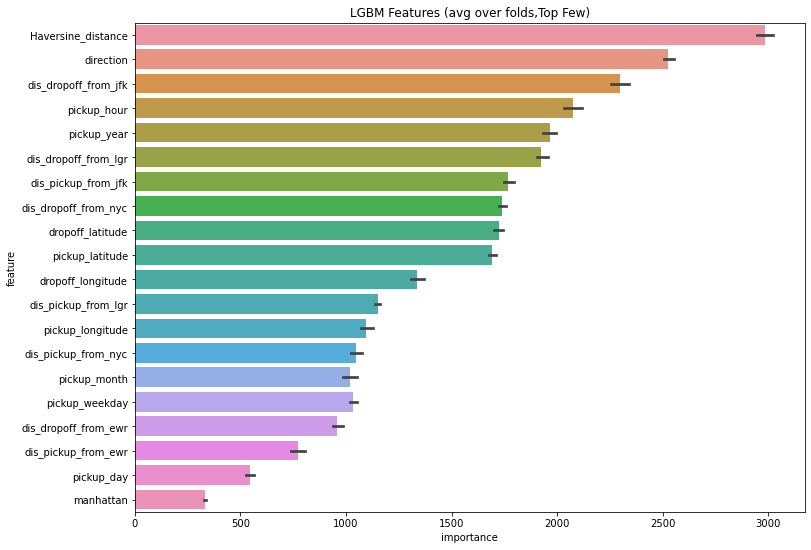

In [92]:
%%time
lgbm_params= {#"max_depth": 5,          #max depth for tree model
              "learning_rate" : 0.02,
    'eval_metric': 'rmse', 
    'objective': 'regression',
              #"num_leaves": 25,        #max number of leaves in one tree
              # 'feature_fraction':0.6,  #LightGBM will randomly select part of features on each tree node
               'bagging_fraction':0.8,    #randomly select part of data without resampling
              # 'max_drop': 5,         #used only in dart,max number of dropped trees during one boosting iteration
               'lambda_l1': 5,
               'lambda_l2': 0.5,
              'min_child_samples':400,  #minimal number of data in one leaf
                'max_bin':20, #max number of bins that feature values will be bucketed in. Higher value--> Overfitting
                'subsample':0.6,  #randomly select part of data without resampling
                'colsample_bytree':0.8, #same as feature_fraction
               'boosting_type': 'gbdt',   #options are dart,gbdt(gradientboosting decision trees), rf,dart,goss
               'task': 'train'}  #weight of labels with positive class

test_pred_stacked_lgbm,stacker_train_lgbm=\
modelling_object.SingleLGBM_oof(params=lgbm_params,num_boost_round=1000,colnames=X_train.columns,importance_plot=True)
#All validation scores (for each folds) come between 3.40-3.97
#LB score around 3.35
# time 4 minutes

In [93]:
results=pd.DataFrame({'key':test['key'],'fare_amount':test_pred_stacked_lgbm})
results.to_csv('/kaggle/working/test_pred_stacked_lgbm.csv',index=False)

results_train=pd.DataFrame({'Model_fare_amount':stacker_train_lgbm[:,0]})
results_train.to_csv('/kaggle/working/stacker_train_lgbm.csv',index=False)

In [94]:
%%time
#Catboost
import catboost
from catboost import CatBoostRegressor
cat_params= {
    'iterations':1000,
    'learning_rate':0.004,
   'depth':5,
    'eval_metric':'RMSE',
    'colsample_bylevel':0.8,
    'random_seed' : 2017,
    'bagging_temperature' : 0.2,
    'early_stopping_rounds':200
} 
test_pred_stacked_cat,stacker_train_cat=\
modelling_object.SingleCatBoost_oof(params=cat_params)
#All validation scores (for each folds) come around 3.72-4.24
#LB score 3.72
#Wall time: 10min 29s

Train model in fold 1
fold 1 RMSE score on VAL is 3.833185
Train model in fold 2
fold 2 RMSE score on VAL is 3.729193
Train model in fold 3
fold 3 RMSE score on VAL is 3.993700
Train model in fold 4
fold 4 RMSE score on VAL is 3.967335
Train model in fold 5
fold 5 RMSE score on VAL is 4.247216
CV score on TRAIN (OOF) is RMSE: 3.957989507194946
CPU times: user 32min 17s, sys: 1min 27s, total: 33min 44s
Wall time: 10min 22s


In [95]:
results=pd.DataFrame({'key':test['key'],'fare_amount':test_pred_stacked_cat})
results.to_csv('/kaggle/working/test_pred_stacked_cat.csv',index=False)

results_train=pd.DataFrame({'Model_fare_amount':stacker_train_cat[:,0]})
results_train.to_csv('/kaggle/working/stacker_train_cat.csv',index=False)

## Level 2 Stacking

In [96]:
columns=['catboost','xgb','lgbm','rf']
train_pred_df_list=[stacker_train_cat,stacker_train_xgb, stacker_train_lgbm, stacker_train_rf]
test_pred_df_list=[test_pred_stacked_cat,test_pred_stacked_xgb,test_pred_stacked_lgbm,test_pred_stacked_rf]
lv1_train_df=pd.DataFrame(columns=columns)
lv1_test_df=pd.DataFrame(columns=columns)
for i in range(len(columns)):
    lv1_train_df[columns[i]]=train_pred_df_list[i][:,0]
    lv1_test_df[columns[i]]=test_pred_df_list[i]
    
lv1_train_df['Y']=y_train.values #add the dependendt variable to training

In [97]:
lv1_train_df.describe()

,catboost,xgb,lgbm,rf,Y
count,972616.000000,972616.000000,972616.000000,972616.000000,972616.000000
mean,11.206402,11.205963,11.206434,11.209196,11.206618
std,7.874239,8.475206,8.359485,8.318129,9.178815
min,4.944227,-8.433543,3.201871,3.539262,2.500000
25%,6.581216,6.334344,6.321435,6.401191,6.000000
50%,8.633944,8.559988,8.569590,8.582818,8.500000
75%,12.181017,12.457175,12.431374,12.417426,12.500000
max,78.914027,194.008530,92.570577,82.781229,500.000000


In [98]:
lv1_train_df.isnull().sum()

catboost    0
xgb         0
lgbm        0
rf          0
Y           0
dtype: int64

Train model in fold 1
Training until validation scores don't improve for 200 rounds
[10]	valid_0's l2: 60.856
[20]	valid_0's l2: 45.9216
[30]	valid_0's l2: 35.9442
[40]	valid_0's l2: 29.2816
[50]	valid_0's l2: 24.8306
[60]	valid_0's l2: 21.8564
[70]	valid_0's l2: 19.873
[80]	valid_0's l2: 18.5477
[90]	valid_0's l2: 17.6623
[100]	valid_0's l2: 17.0703
[110]	valid_0's l2: 16.6731
[120]	valid_0's l2: 16.4085
[130]	valid_0's l2: 16.2309
[140]	valid_0's l2: 16.1129
[150]	valid_0's l2: 16.0351
[160]	valid_0's l2: 15.9828
[170]	valid_0's l2: 15.9477
[180]	valid_0's l2: 15.9246
[190]	valid_0's l2: 15.9093
[200]	valid_0's l2: 15.8984
[210]	valid_0's l2: 15.8906
[220]	valid_0's l2: 15.8844
[230]	valid_0's l2: 15.8798
[240]	valid_0's l2: 15.8766
[250]	valid_0's l2: 15.874
[260]	valid_0's l2: 15.872
[270]	valid_0's l2: 15.8707
[280]	valid_0's l2: 15.8698
[290]	valid_0's l2: 15.8695
[300]	valid_0's l2: 15.8683
[310]	valid_0's l2: 15.8676
[320]	valid_0's l2: 15.8667
[330]	valid_0's l2: 15.8662
[340]

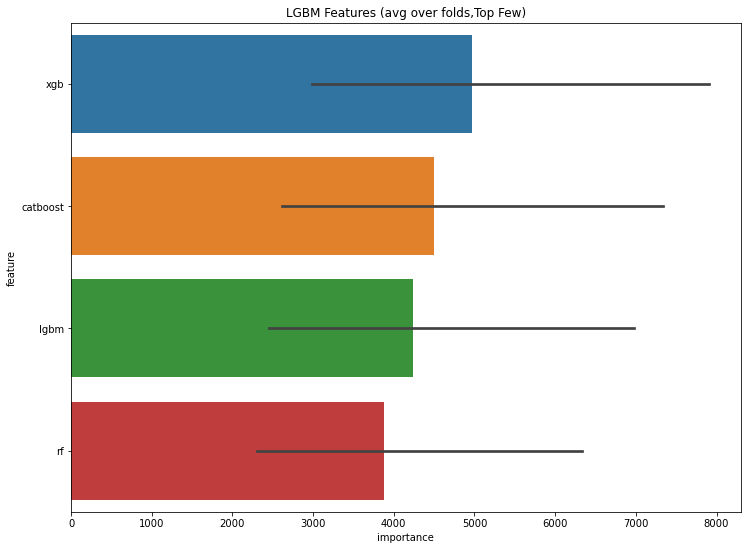

In [99]:
#LGBM Level 2
l2_modelling_object = Modelling(X=lv1_train_df.drop('Y',axis=1).values, y=lv1_train_df['Y'].values, \
                                test_X=lv1_test_df.values, folds=folds, N=5)

test_pred_stacked_lgbm_L2,stacker_train_lgbm_L2=\
l2_modelling_object.SingleLGBM_oof(params=lgbm_params,num_boost_round=10000,colnames=columns,importance_plot=True)

In [100]:
results=pd.DataFrame({'key':test['key'],'fare_amount':test_pred_stacked_lgbm_L2})
results.to_csv('/kaggle/working/test_pred_stacked_lgbm_L2.csv',index=False)

In [101]:
#XGB L2
test_pred_stacked_xgb_L2,stacker_train_xgb_L2=l2_modelling_object.SingleXGB_oof(params_for_xgb,1000)

Train model in fold 1
[0]	train-rmse:13.58833	val-rmse:13.52997
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 200 rounds.
[10]	train-rmse:9.40733	val-rmse:9.34719
[20]	train-rmse:6.76364	val-rmse:6.70809
[30]	train-rmse:5.16782	val-rmse:5.12470
[40]	train-rmse:4.25685	val-rmse:4.23806
[50]	train-rmse:3.76914	val-rmse:3.77997
[60]	train-rmse:3.51128	val-rmse:3.55560
[70]	train-rmse:3.37889	val-rmse:3.45362
[80]	train-rmse:3.30906	val-rmse:3.40907
[90]	train-rmse:3.26787	val-rmse:3.39016
[100]	train-rmse:3.24211	val-rmse:3.38221
[110]	train-rmse:3.22176	val-rmse:3.37907
[120]	train-rmse:3.20528	val-rmse:3.37828
[130]	train-rmse:3.19280	val-rmse:3.37860
[140]	train-rmse:3.18247	val-rmse:3.37854
[150]	train-rmse:3.17409	val-rmse:3.37930
[160]	train-rmse:3.16788	val-rmse:3.37994
[170]	train-rmse:3.16388	val-rmse:3.38084
[180]	train-rmse:3.15870	val-rmse:3.38124
[190]	train-rmse:3.15469	val-rmse:3.38168
[200]

In [102]:
results=pd.DataFrame({'key':test['key'],'fare_amount':test_pred_stacked_xgb_L2})
results.to_csv('/kaggle/working/test_pred_stacked_xgb_L2_final.csv',index=False)
#from kaggle
# from IPython.display import FileLinks
# FileLinks('.')